In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time
import matplotlib.pyplot as plt

import os
chromedriver = "/Applications/chromedriver" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [5]:
symbol='ccni'
url_path = f'https://www.nasdaq.com/symbol/{symbol}/call-transcripts'
response = requests.get(url_path)
soup = BeautifulSoup(response.text,'lxml')
soup

<!DOCTYPE html>
<html class="wide quotes-responsive quotes-300-right no-js" lang="en-us" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://ogp.me/ns#">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K2BQVP7');</script>
<!-- End Google Tag Manager -->
<script>
(function(){
    var is_chrome;
    if(typeof navigator.vendor!="undefined")
	    is_chrome = ((navigator.userAgent.toLowerCase().indexOf('chrome') > -1) && (navigator.vendor.toLowerCase().indexOf("google") > -1));
    else
	    is_chrome = false;
})();
</script>
<!-- includes\2-column-quotes-300-right.master -->
<meta charset="utf-8"/>
<meta content="IE=Edge;chrome=1" http-equiv="X-UA-Compatible

In [6]:
query = re.compile('Q1 2018')
unrefined_string = soup.find(text=query).find_parents('span')
unrefined_string

[<span class="fontS14px">
 <a href="/aspx/call-transcript.aspx?StoryId=4173087&amp;Title=command-center-s-ccni-ceo-richard-coleman-on-q1-2018-results-earnings-call-transcript">Command Center's (CCNI) CEO Richard Coleman on Q1 2018 Results - Earnings Call Transcript</a>
 </span>]

In [57]:
aug_path = unrefined_string[0].find('a')['href']
call_url = f'http://www.nasdaq.com'+aug_path
call_response = requests.get(call_url)
soup = BeautifulSoup(call_response.text,'lxml')
soup

<!DOCTYPE html>
<html class="wide quotes-responsive quotes-300-right no-js" lang="en-us" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://ogp.me/ns#">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K2BQVP7');</script>
<!-- End Google Tag Manager -->
<script>
(function(){
    var is_chrome;
    if(typeof navigator.vendor!="undefined")
	    is_chrome = ((navigator.userAgent.toLowerCase().indexOf('chrome') > -1) && (navigator.vendor.toLowerCase().indexOf("google") > -1));
    else
	    is_chrome = false;
})();
</script>
<!-- includes\2-column-quotes-300-right.master -->
<meta charset="utf-8"/>
<meta content="IE=Edge;chrome=1" http-equiv="X-UA-Compatible

In [123]:
soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')
raw_transcript = [item.text for item in soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')]
transcript = "".join(raw_transcript[raw_transcript.index('')+1:raw_transcript.index('Read the rest of this transcript for free on seekingalpha.com')])
transcript

'Your hosting speaker today, Managing Director, Head of Investor Relations, Angie Park. Please go ahead.Angie ParkThank you, Kevin. And thanks everyone for joining us today on our first quarter fiscal 2018 earnings announcement. As the operator just mentioned, I’m Angie Park, Managing Director, Head of Investor Relations.With me today are Pierre Nanterme, our Chairman and Chief Executive Officer; and David Rowland, our Chief Financial Officer. We hope you’ve had an opportunity to review the news release we issued a short time ago.Let me quickly outline the agenda for today’s call. Pierre will begin with an overview of our results. David will take you through the financial details, including the income statement and balance sheet for the first quarter. Pierre will then provide a brief update on our market positioning before David provides our outlook for the second quarter and full fiscal year 2018. We will then take your questions before Pierre provides a wrap-up at the end of the call

In [512]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0] # returns a list for each table
sp = sp
sp[90:]

Security Symbol SEC filings             GICS Sector  \
90               Capri Holdings   CPRI     reports  Consumer Discretionary   
91         Cardinal Health Inc.    CAH     reports             Health Care   
92                   Carmax Inc    KMX     reports  Consumer Discretionary   
93               Carnival Corp.    CCL     reports  Consumer Discretionary   
94             Caterpillar Inc.    CAT     reports             Industrials   
95          Cboe Global Markets   CBOE     reports              Financials   
96                   CBRE Group   CBRE     reports             Real Estate   
97                    CBS Corp.    CBS     reports  Communication Services   
98               Celanese Corp.     CE     reports               Materials   
99                Celgene Corp.   CELG     reports             Health Care   
100         Centene Corporation    CNC     reports             Health Care   
101          CenterPoint Energy    CNP     reports               Utilities   
102             CenturyLink Inc    CTL     reports  Communication Services   
103                      Cerner   CERN     reports             Health Care   
104  CF Industries Holdings Inc     CF     reports               Materials   
105  Charles Schwab Corporation   SCHW     reports              Financials   
106      Charter Communications   CHTR     reports  Communication Services   
107               Chevron Corp.    CVX     reports                  Energy   
108      Chipotle Mexican Grill    CMG     reports  Consumer Discretionary   
109               Chubb Limited     CB     reports              Financials   
110             Church & Dwight    CHD     reports        Consumer Staples   
111                 CIGNA Corp.     CI     reports             Health Care   
112              Cimarex Energy    XEC     reports                  Energy   
113        Cincinnati Financial   CINF     reports              Financials   
114          Cintas Corporation   CTAS     reports             Industrials   
115               Cisco Systems   CSCO     reports  Information Technology   
116              Citigroup Inc.      C     reports              Financials   
117    Citizens Financial Group    CFG     reports              Financials   
118              Citrix Systems   CTXS     reports  Information Technology   
119          The Clorox Company    CLX     reports        Consumer Staples   
..                          ...    ...         ...                     ...   
475                 Viacom Inc.   VIAB     reports  Communication Services   
476                   Visa Inc.      V     reports  Information Technology   
477        Vornado Realty Trust    VNO     reports             Real Estate   
478            Vulcan Materials    VMC     reports               Materials   
479          Wabtec Corporation    WAB     reports             Industrials   
480                     Walmart    WMT     reports        Consumer Staples   
481    Walgreens Boots Alliance    WBA     reports        Consumer Staples   
482     The Walt Disney Company    DIS     reports  Communication Services   
483       Waste Management Inc.     WM     reports             Industrials   
484          Waters Corporation    WAT     reports             Health Care   
485        Wec Energy Group Inc    WEC     reports               Utilities   
486                    WellCare    WCG     reports             Health Care   
487                 Wells Fargo    WFC     reports              Financials   
488              Welltower Inc.   WELL     reports             Real Estate   
489             Western Digital    WDC     reports  Information Technology   
490            Western Union Co     WU     reports  Information Technology   
491                    WestRock    WRK     reports               Materials   
492                Weyerhaeuser     WY     reports             Real Estate   
493             Whirlpool Corp.    WHR     reports  Consumer Discretionary   
494               Williams Cos.    WMB     re

In [520]:

from collections import defaultdict
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

my_dict = defaultdict(str)
#BRK.B, CPRI, SCHW have no earnings call transcript for Q4 2018
SYMBOLS = sp['Symbol'].drop([71,90,105])

cnt=0
captcha=[]
captcha2=[]
for symbol in SYMBOLS:
    url_path = f'https://www.nasdaq.com/symbol/{symbol}/call-transcripts'
    response = requests.get(url_path)
    soup = BeautifulSoup(response.text,'lxml')
    query = re.compile('Q3 2018')
    if not soup.find(text=query): 
        print(1)
        # If page is dynamically loading from javascript, I couldn't locate href. Then, use selenium
        # to obtain rendered page
        alter_url=f'https://seekingalpha.com/symbol/{symbol}/earnings/transcripts'
#         driver = webdriver.Chrome(chromedriver)
#         driver.get(url_path)
#         soup = BeautifulSoup(driver.page_source,'lxml')
#         soup.find_all('a')
        response = requests.get(alter_url)
        soup = BeautifulSoup(response.text,'lxml')
        if soup.find(text=re.compile('captcha')) != None:
            captcha.append(symbol)
            continue
        aug_path = soup.find(text=query).find_parent()['href']
        call_url = f'https://seekingalpha.com'+aug_path
        call_response = requests.get(call_url)
        soup = BeautifulSoup(call_response.text,'lxml')
        if soup.find(text=re.compile('captcha')) != None:
            captcha2.append(symbol)
            continue
        raw_transcript = [item.text for item in soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')]
        raw_transcript=raw_transcript[raw_transcript.index('')+1:]
        raw_transcript=''.join(raw_transcript)
    else:
        unrefined_string = soup.find(text=query).find_parents('span')
        aug_path = unrefined_string[0].find('a')['href']
        call_url = f'http://www.nasdaq.com'+aug_path

        call_response = requests.get(call_url)
        soup = BeautifulSoup(call_response.text,'lxml')
        raw_transcript = [item.text for item in soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')]
        raw_transcript=''.join(raw_transcript)
        raw_transcript=raw_transcript[raw_transcript.find('Operator')+8:]
        if raw_transcript.find('Operator') != -1:
            raw_transcript=raw_transcript[raw_transcript.find('Operator')+8:]
        else:
            raw_transcript=raw_transcript[raw_transcript.find('Presentation')+5:]

    exec(f'my_dict["{symbol}"] += raw_transcript[:raw_transcript.find("Read the rest of")]')
    cnt+=1
    if cnt%10 ==0: print(f"{cnt} companies' transcript read")

my_dict


10 companies' transcript read
20 companies' transcript read
1
30 companies' transcript read
40 companies' transcript read
50 companies' transcript read
60 companies' transcript read
70 companies' transcript read
80 companies' transcript read
90 companies' transcript read
1
100 companies' transcript read
1
1
110 companies' transcript read
120 companies' transcript read
1
130 companies' transcript read
140 companies' transcript read
1
150 companies' transcript read
1
160 companies' transcript read
170 companies' transcript read
1
180 companies' transcript read
190 companies' transcript read
200 companies' transcript read
210 companies' transcript read
220 companies' transcript read
230 companies' transcript read
240 companies' transcript read
250 companies' transcript read
1
260 companies' transcript read
270 companies' transcript read
1
280 companies' transcript read
1
290 companies' transcript read
300 companies' transcript read
1
1
1
310 companies' transcript read
320 companies' trans

defaultdict(str,
            {'MMM': "uld now like to turn the call over to Bruce Jermeland, Director of Investor Relations at 3M.Bruce JermelandThank you and good morning, everyone. Welcome to our third quarter 2018 business review. With me today are Mike Roman, 3M's Chief Executive Officer; and Nick Gangestad, our Chief Financial Officer. Mike and Nick will make some formal comments, and then we'll take your questions. Please note that today's earnings release and slide presentations accompanying this call are posted on our Investor Relations website at 3m.com under the heading Quarterly Earnings.Before we begin, let me remind you of the dates for our upcoming investor events found on Slide 2. First, we will be hosting our Investor Day at your headquarters in St. Paul, Minnesota in a few weeks with a welcome reception in the evening of Wednesday, November 14th where we will be highlighting how 3M Science is advancing our priority markets for growth. Along with the formal presentation

In [ ]:
soup.find(text=query).find_parent().find_parent().find_parent()
query2=re.compile('q1-2018')
[item for item in soup.find_all('a') if 'q1-2018' in str(item)]

In [262]:
soup.find(text=query).find_parents('span')==[]

False

In [263]:
driver = webdriver.Chrome(chromedriver)
driver.get(url_path)

In [267]:
soup = BeautifulSoup(driver.page_source,'lxml')

NoSuchWindowException: Message: no such window: window was already closed
  (Session info: chrome=73.0.3683.103)
  (Driver info: chromedriver=73.0.3683.68 (47787ec04b6e38e22703e856e101e840b65afe72),platform=Mac OS X 10.14.3 x86_64)


In [268]:
soup.find_all('a')
query = re.compile('Q1 2018')
unrefined_string = soup.find(text=query).find_parents('span')
unrefined_string

[<span class="fontS14px">
 <a href="/aspx/call-transcript.aspx?StoryId=4133293&amp;Title=accenture-s-acn-ceo-pierre-nanterme-on-q1-2018-results-earnings-call-transcript">Accenture's (ACN) CEO Pierre Nanterme on Q1 2018 Results - Earnings Call Transcript</a>
 </span>]

In [264]:
soup

<!DOCTYPE html>
<html class="wide quotes-responsive quotes-300-right" lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://ogp.me/ns#"><head></head><body><iframe src="javascript:void(0)" style="width: 0px; height: 0px; border: 0px; display: none;" title=""></iframe><script async="" src="https://de.tynt.com/deb/v2?m=xch&amp;id=apOVCYiV0r35wBadbiUzgI&amp;dn=SIAB&amp;cc=2&amp;r=" type="text/javascript"></script><script async="" src="https://de.tynt.com/deb/v2?m=xch&amp;id=apOVCYiV0r35wBadbiUzgI&amp;dn=SIAB&amp;cc=1&amp;r=" type="text/javascript"></script><script async="" src="https://de.tynt.com/deb/v2?id=apOVCYiV0r35wBadbiUzgI&amp;dn=SIAB&amp;cc=1&amp;r=" type="text/javascript"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2019032901.js"></script><script async="" src="https://www.nasdaq.

In [274]:
soup.find(text=query).find_parents('span')

[<span class="fontS14px">
 <a href="/aspx/call-transcript.aspx?StoryId=4133293&amp;Title=accenture-s-acn-ceo-pierre-nanterme-on-q1-2018-results-earnings-call-transcript">Accenture's (ACN) CEO Pierre Nanterme on Q1 2018 Results - Earnings Call Transcript</a>
 </span>]

In [284]:
soup

<!DOCTYPE html>
<html class="wide quotes-responsive quotes-300-right" lang="en-us" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://ogp.me/ns#"><head></head><body><iframe src="javascript:void(0)" style="width: 0px; height: 0px; border: 0px; display: none;" title=""></iframe><script async="" src="https://www.nasdaq.com/includes/nasdaqdeferred.min-04242018v1.js"></script><script async="" src="https://de.tynt.com/deb/v2?m=xch&amp;id=apOVCYiV0r35wBadbiUzgI&amp;dn=SIAB&amp;cc=1&amp;r=" type="text/javascript"></script><script async="" src="https://de.tynt.com/deb/v2?id=apOVCYiV0r35wBadbiUzgI&amp;dn=SIAB&amp;cc=1&amp;r=" type="text/javascript"></script><script src="https://www.googletagservices.com/activeview/js/current/osd.js?cb=%2Fr20100101"></script><script src="https://securepubads.g.doubleclick.net/gpt/pubads_impl_rendering_2019032901.js"></script><script async="" src="https://rules.quantcount.com/rules-p-kGNZ2CXTUFYyw.js"></script><scr

In [285]:
url_path

'https://www.nasdaq.com/symbol/GOOGL/call-transcripts'

In [288]:
soup

<!DOCTYPE html>
<html class="wide quotes-responsive quotes-300-right no-js" lang="en-us" xmlns:fb="https://www.facebook.com/2008/fbml" xmlns:og="https://ogp.me/ns#">
<head>
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-K2BQVP7');</script>
<!-- End Google Tag Manager -->
<script>
(function(){
    var is_chrome;
    if(typeof navigator.vendor!="undefined")
	    is_chrome = ((navigator.userAgent.toLowerCase().indexOf('chrome') > -1) && (navigator.vendor.toLowerCase().indexOf("google") > -1));
    else
	    is_chrome = false;
})();
</script>
<!-- includes\2-column-quotes-300-right.master -->
<meta charset="utf-8"/>
<meta content="IE=Edge;chrome=1" http-equiv="X-UA-Compatible

In [289]:
my_dict['MMM']

''

In [295]:
(''.join(raw_transcript)).find('Read the rest')


6045

In [298]:
raw_transcript

"Join the Nasdaq Community today and get free, instant access to portfolios, stock ratings, real-time alerts, and more!Enter up to 25 symbols separated by commas or spaces in the text box below. These symbols will be available during your session for use on applicable pages.\r\n            Don't know the stock symbol?  Use the \r\n            Symbol Lookup tool.\r\n\t        \nAlphabetize the sort order of my symbols\r\n\t\tAllstate Corporation (ALL)Q4 2018 Earnings Conference CallFebruary 6, 2019 9:30 AM ETCompany ParticipantsJohn Griek - Head of Investor RelationsTom Wilson - Chairman, President and Chief Executive OfficerMario Rizzo - Chief Financial officerGlenn Shapiro - President of Allstate Personal LinesSteve Shebik - Vice ChairDon Civgin - President of Service BusinessesConference Call ParticipantsElyse Greenspan - Wells FargoGary Ransom - Dowling & PartnersGreg Peters - Raymond JamesMike Zaremski - Credit SuisseAmit Kumar - The Buckingham Research Group, Inc.Kai Pan - Morgan 

In [348]:
alter_url=f'https://seekingalpha.com/symbol/{symbol}/earnings/transcripts'
alter_url

'https://seekingalpha.com/symbol/CPRI/earnings/transcripts'

In [344]:
symbol

'BRK.B'

In [352]:
alter_url=f'https://seekingalpha.com/symbol/{symbol}/earnings/transcripts'
alter_url

'https://seekingalpha.com/symbol/GOOGL/earnings/transcripts'

In [358]:
soup.find(text=re.compile('captcha')) != None

True

In [367]:
url_path

'https://www.nasdaq.com/symbol/CPRI/call-transcripts'

In [361]:
call_url

'https://seekingalpha.com/article/4214694-alphabet-goog-q3-2018-results-earnings-call-transcript'

In [363]:
soup.find(text=re.compile('captcha')) != None

True

In [521]:
pd.Series(my_dict).to_csv('Earnings_Transcript_2018Q3.csv')
captcha

['GOOGL',
 'CNP',
 'CTAS',
 'CSCO',
 'ED',
 'DISCA',
 'DOW',
 'EXPD',
 'JEF',
 'LLL',
 'LIN',
 'MDT',
 'MU',
 'MSFT',
 'NWS',
 'PGR',
 'CRM',
 'TROW',
 'FOX',
 'UA',
 'WMT']

In [522]:
captcha2

[]

In [388]:
raw_transcript

"The presentation materials and additional financial tables are currently posted on the Investor Relations section of zoetis.com. The presentation slides can be managed by you, the viewer, and will not be forwarded automatically. In addition, a replay of this call will be available approximately two hours after the conclusion of this call via dial-in or on the Investor Relations section of zoetis.com.At this time, all participants have been placed in a listen-only mode, and the floor will be open for your questions following the presentationIt's now my pleasure to turn the floor over to Steve Frank. Steve, you may begin.Steve Frank - Zoetis, Inc.Thank you. Good morning, everyone, and welcome to the Zoetis Third Quarter 2018 Earnings Call. I am joined today by Juan Ramón Alaix, our Chief Executive Officer, and Glenn David, our Chief Financial Officer. Before we begin, I'll remind you that the slides presented on this call are available on the Investor Relations section of our website an

In [397]:
raw_transcript

"I would now like to turn the call over to Bruce Jermeland, Director of Investor Relations at 3M.Bruce JermelandThank you and good morning, everyone. Welcome to our third quarter 2018 business review. With me today are Mike Roman, 3M's Chief Executive Officer; and Nick Gangestad, our Chief Financial Officer. Mike and Nick will make some formal comments, and then we'll take your questions. Please note that today's earnings release and slide presentations accompanying this call are posted on our Investor Relations website at 3m.com under the heading Quarterly Earnings.Before we begin, let me remind you of the dates for our upcoming investor events found on Slide 2. First, we will be hosting our Investor Day at your headquarters in St. Paul, Minnesota in a few weeks with a welcome reception in the evening of Wednesday, November 14th where we will be highlighting how 3M Science is advancing our priority markets for growth. Along with the formal presentation program, on Thursday November 15

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))
X = vectorizer.fit_transform(my_dict.values())
X.toarray()   


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [524]:
vectorizer.get_feature_names() 

['00',
 '00 01',
 '00 03',
 '00 05',
 '00 06',
 '00 07',
 '00 17',
 '00 25',
 '00 28',
 '00 36',
 '00 38',
 '00 40',
 '00 56',
 '00 across',
 '00 am',
 '00 before',
 '00 consumers',
 '00 eastern',
 '00 pacific',
 '00 pm',
 '000',
 '000 000',
 '000 acquired',
 '000 additional',
 '000 agencies',
 '000 and',
 '000 annually',
 '000 available',
 '000 barrel',
 '000 barrels',
 '000 boe',
 '000 boes',
 '000 bopd',
 '000 china',
 '000 claims',
 '000 colleagues',
 '000 customer',
 '000 customers',
 '000 debit',
 '000 dedicated',
 '000 design',
 '000 diabetic',
 '000 earned',
 '000 emergency',
 '000 employees',
 '000 excluding',
 '000 feet',
 '000 fewer',
 '000 for',
 '000 gas',
 '000 grocery',
 '000 hard',
 '000 have',
 '000 high',
 '000 hotel',
 '000 households',
 '000 in',
 '000 individuals',
 '000 itw',
 '000 jobs',
 '000 less',
 '000 lines',
 '000 lots',
 '000 met',
 '000 miles',
 '000 more',
 '000 net',
 '000 new',
 '000 nodes',
 '000 of',
 '000 open',
 '000 ounces',
 '000 patients',
 '000

In [525]:
X.shape

(481, 149964)

zero                   7065
younger                7064
young                  7063
york city              7062
york                   7061
yields                 7060
yielding               7059
yielded                7058
yield                  7057
yesterday press        7056
yesterday earnings     7055
yesterday afternoon    7054
yesterday              7053
yes                    7052
years ve               7051
years come             7050
years ahead            7049
years ago              7048
year versus            7047
year ve                7046
year total             7045
year time              7044
year strong            7043
year sequentially      7042
year saw               7041
year sales             7040
year row               7039
year revenue           7038
year results           7037
year result            7036
                       ... 
10 increase              29
10 forward               28
10 form                  27
10 fiscal                26
10 filings          

In [2]:
import pickle
with open("my_data.pkl", 'rb') as picklefile: 
    my_dict= pickle.load(picklefile)

In [40]:
vectorizer = CountVectorizer(max_df=0.25, min_df=0.01,stop_words='english')
vectorizer.fit_transform(["20.messier is a try!"])

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [41]:
vectorizer.vocabulary_

{'20': 0, 'messier': 2, 'is': 1, 'try': 3}

In [ ]:
nb = MultinomialNB()
nb.fit(doc_term_matrix, train.polarity)
predicted_polarity = nb.predict(test_dtm)


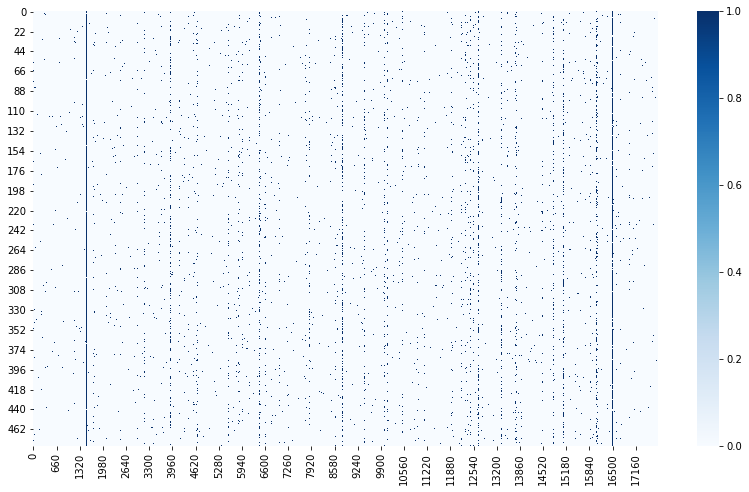

In [29]:
import seaborn as sns
sns.heatmap(pd.DataFrame(doc_term_matrix.todense()), cmap='Blues')
plt.gcf().set_size_inches(14, 8);

In [55]:
lemmatized_words = vectorizer.get_feature_names()
word_freq = doc_term_matrix.sum(axis=0)
word_freq_1d = np.squeeze(np.asarray(word_freq))
word_freq_1d = pd.Series(word_freq_1d, index=lemmatized_words).div(pd.Series(my_dict).shape[0])
word_freq_1d.sort_values(ascending=False).head(20)

quarter        8.765073
year           6.008316
growth         4.498960
results        3.721414
today          3.288981
earnings       2.920998
financial      2.906445
business       2.642412
million        2.617464
statements     2.515593
2018           2.278586
forward        2.266112
strong         2.261954
gaap           2.176715
looking        2.116424
revenue        2.064449
share          2.031185
new            1.987526
sales          1.881497
performance    1.827443
dtype: float64

In [56]:
lemmatized_words

['00',
 '000',
 '001',
 '008',
 '0088',
 '01',
 '012',
 '02',
 '021',
 '029',
 '03',
 '04',
 '046',
 '05',
 '06',
 '066',
 '07',
 '0748',
 '075',
 '07bdc1',
 '08',
 '09',
 '096',
 '10',
 '100',
 '1000',
 '101',
 '10123967',
 '10125306',
 '102',
 '103',
 '104',
 '1040ez',
 '105',
 '106',
 '107',
 '108',
 '109',
 '10b5',
 '10th',
 '10x',
 '11',
 '110',
 '111',
 '1112',
 '112',
 '112g',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '11ax',
 '11th',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '1247',
 '125',
 '126',
 '127',
 '128',
 '129',
 '12th',
 '13',
 '130',
 '130j',
 '132',
 '133',
 '134',
 '1346',
 '135',
 '136',
 '13683414',
 '137',
 '138',
 '1380',
 '139',
 '13th',
 '14',
 '140',
 '141',
 '142',
 '143',
 '144',
 '145',
 '146',
 '147',
 '148',
 '14th',
 '15',
 '150',
 '150s',
 '151',
 '152',
 '153',
 '154',
 '155',
 '157',
 '159',
 '1598024',
 '15th',
 '16',
 '160',
 '162',
 '163',
 '164',
 '165',
 '166',
 '167',
 '168',
 '169',
 '16th',
 '17',
 '170',
 '171',
 '172'

In [57]:
my_dict.keys()

dict_keys(['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'ANET', 'AJG', 'AIZ', 'ATO', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BF.B', 'CHRW', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CAT', 'CBOE', 'CBRE', 'CBS', 'CE', 'CELG', 'CNC', 'CTL', 'CERN', 'CF', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'STZ', 'COO', 'CPRT', 'GLW', 'COST', 'COTY', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', '

In [10]:

from collections import defaultdict
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

dates = defaultdict(str)
cnt=0
captcha=[]
captcha2=[]

for symbol in my_dict.keys():
    url_path = f'https://www.nasdaq.com/symbol/{symbol}/call-transcripts'
    response = requests.get(url_path)
    soup = BeautifulSoup(response.text,'lxml')
    query = re.compile('Q3 2018')
    if not soup.find(text=query): 
        print(1)
        # If page is dynamically loading from javascript, I couldn't locate href. Then, use selenium
        # to obtain rendered page
        alter_url=f'https://seekingalpha.com/symbol/{symbol}/earnings/transcripts'
    #         driver = webdriver.Chrome(chromedriver)
    #         driver.get(url_path)
    #         soup = BeautifulSoup(driver.page_source,'lxml')
    #         soup.find_all('a')
        response = requests.get(alter_url)
        soup = BeautifulSoup(response.text,'lxml')
        if soup.find(text=re.compile('captcha')) != None:
            captcha.append(symbol)
            print('captcha1')
        aug_path = soup.find(text=query).find_parent()['href']
        call_url = f'https://seekingalpha.com'+aug_path
        call_response = requests.get(call_url)
        soup = BeautifulSoup(call_response.text,'lxml')
        if soup.find(text=re.compile('captcha')) != None:
            captcha2.append(symbol)
            print('captcha2')
        raw_transcript = [item.text for item in soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')]
        raw_transcript=raw_transcript[raw_transcript.index('')+1:]
        raw_transcript=''.join(raw_transcript)
    else:
        unrefined_string = soup.find(text=query).find_parents('span')
        aug_path = unrefined_string[0].find('a')['href']
        call_url = f'http://www.nasdaq.com'+aug_path

        call_response = requests.get(call_url)
        soup = BeautifulSoup(call_response.text,'lxml')
        raw_transcript = [item.text for item in soup.find(text=query).find_parent().find_parent().find_parent().find_all('p')]
        raw_transcript=''.join(raw_transcript)
        Months = ['January', 'February','March', 'April','May','June','July','August','September','October','November','December']
        month_cand = []
        for month in Months:
            idx = raw_transcript.find(month)
            if idx > 0:
                month_cand.append(idx)
        idx = min(month_cand)
        idx2 = raw_transcript[idx:].find(' ')
        idx3 = raw_transcript[idx+idx2 +1:].find(' ')
        idx4 = raw_transcript[idx+idx2+idx3 +2:].find(' ')
        exec("dates[f'{symbol}'] = raw_transcript[idx:idx+idx2+idx3+idx4+2]")
dates





defaultdict(str,
            {'MMM': 'October 23, 2018',
             'ABT': 'October 17, 2018',
             'ABBV': 'November 02, 2018',
             'ABMD': 'February 01, 2018',
             'ACN': 'June 28 2018',
             'ATVI': 'November 08, 2018',
             'ADBE': 'September 13, 2018,',
             'AMD': 'October 24, 2018',
             'AAP': 'November 13, 2018',
             'AES': 'November 6, 2018',
             'AMG': 'October 29, 2018,',
             'AFL': 'October 25, 2018',
             'A': 'August 14, 2018,',
             'APD': 'July 26, 2018',
             'AKAM': 'October 29, 2018',
             'ALK': 'October 25, 2018',
             'ALB': 'November 08, 2018',
             'ARE': 'October 30, 2018',
             'ALXN': 'October 24, 2018',
             'ALGN': 'October 24, 2018',
             'ALLE': 'October 25, 2018',
             'AGN': 'October 30, 2018',
             'ADS': 'October 18, 2018',
             'LNT': 'November 07, 2018,',
             

In [97]:
my_dict.keys()

dict_keys([])

In [93]:
Months = ['January', 'February','March', 'April','May','June','July','August','September','October','November','December']
month_cand = []
for month in Months:
    idx = raw_transcript.find(month)
    if idx > 0:
        month_cand.append(idx)
idx = min(month_cand)
idx2 = raw_transcript[idx:].find(' ')
idx3 = raw_transcript[idx+idx2 +1:].find(' ')
idx4 = raw_transcript[idx+idx2+idx3 +2:].find(' ')
raw_transcript[idx:idx+idx2+idx3+idx4+2]


'June 28 2018'

In [73]:
raw_transcript[5290:]

't Day in April.So before I get into the details of the quarter, let me summarize the major headlines of our third quarter results. Net revenue increased more than $1.4 billion, reflecting growth of a 11% local currency and representing the third consecutive quarter of double-digit growth.The strong top line growth exceeded our expectations and reflected strong and balanced growth across all operating groups and geographic areas with several growing double digits. The growth continues to significantly outpace the market, reflecting both our leadership position in "the New" and the durability of our diverse yet highly focused growth model.Read the rest of this transcript for free on seekingalpha.comEnter up to 25 symbols separated by commas or spaces in the text box below. These symbols will be available during your session for use on applicable pages.\r\n\t\t\t\t\tYou have selected to change your default setting for the Quote Search. This will now be your default target page;\r\n\t\t\t

In [3]:

import pickle

with open('date.pkl', 'wb') as picklefile:
    pickle.dump(dates, picklefile)

NameError: name 'dates' is not defined

In [8]:
with open('date.pkl', 'rb') as picklefile:
    wow = pickle.load(picklefile)
wow

EOFError: Ran out of input

In [110]:
vectorizer = CountVectorizer(max_df=0.25, min_df=0.01,stop_words='english',ngram_range=(1,2))
doc_term_matrix = vectorizer.fit_transform(my_dict.values())
vocab_cnt = pd.Series(vectorizer.vocabulary_)
#vocab_cnt_adj = vocab_cnt.drop('uld')
vocab_cnt.sort_values(ascending=False)

zero                   7065
younger                7064
young                  7063
york city              7062
york                   7061
yields                 7060
yielding               7059
yielded                7058
yield                  7057
yesterday press        7056
yesterday earnings     7055
yesterday afternoon    7054
yesterday              7053
yes                    7052
years ve               7051
years come             7050
years ahead            7049
years ago              7048
year versus            7047
year ve                7046
year total             7045
year time              7044
year strong            7043
year sequentially      7042
year saw               7041
year sales             7040
year row               7039
year revenue           7038
year results           7037
year result            7036
                       ... 
10 increase              29
10 forward               28
10 form                  27
10 fiscal                26
10 filings          

In [117]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=5, n_iter=5, random_state=42)
svd.fit(doc_term_matrix)
svd.explained_variance_ratio_


array([0.00343149, 0.01372904, 0.01335   , 0.01082885, 0.01038754])

In [119]:
doc_topics = svd.transform(doc_term_matrix)
doc_topics.shape


(481, 5)

In [121]:
from numpy.random import randint
i = randint(0, len(train_docs))
my_dict.iloc[i, :2].append(pd.Series(doc_topics[i], index=topic_labels))


NameError: name 'train_docs' is not defined

In [82]:
earnings_dates =pd.to_datetime(pd.Series(dates))
earnings_dates

MMM    2018-10-23
ABT    2018-10-17
ABBV   2018-11-02
ABMD   2018-02-01
ACN    2018-06-28
ATVI   2018-11-08
ADBE   2018-09-13
AMD    2018-10-24
AAP    2018-11-13
AES    2018-11-06
AMG    2018-10-29
AFL    2018-10-25
A      2018-08-14
APD    2018-07-26
AKAM   2018-10-29
ALK    2018-10-25
ALB    2018-11-08
ARE    2018-10-30
ALXN   2018-10-24
ALGN   2018-10-24
ALLE   2018-10-25
AGN    2018-10-30
ADS    2018-10-18
LNT    2018-11-07
ALL    2018-11-01
GOOG   2018-10-25
MO     2018-10-25
AMZN   2018-10-25
AEE    2018-10-31
AAL    2018-10-25
          ...    
VRTX   2018-10-24
VIAB   2018-08-09
V      2018-07-25
VNO    2018-10-30
VMC    2018-10-30
WAB    2018-10-30
WBA    2018-06-28
DIS    2018-08-07
WM     2018-10-25
WAT    2018-10-23
WEC    2018-10-31
WCG    2018-10-30
WFC    2018-10-12
WELL   2018-10-30
WDC    2018-04-26
WU     2018-11-01
WRK    2018-08-02
WY     2018-10-26
WHR    2018-10-25
WMB    2018-11-01
WLTW   2018-11-02
WYNN   2018-11-07
XEL    2018-10-25
XRX    2018-10-23
XLNX   201

In [9]:
my_dict

defaultdict(str,
            {'MMM': "uld now like to turn the call over to Bruce Jermeland, Director of Investor Relations at 3M.Bruce JermelandThank you and good morning, everyone. Welcome to our third quarter 2018 business review. With me today are Mike Roman, 3M's Chief Executive Officer; and Nick Gangestad, our Chief Financial Officer. Mike and Nick will make some formal comments, and then we'll take your questions. Please note that today's earnings release and slide presentations accompanying this call are posted on our Investor Relations website at 3m.com under the heading Quarterly Earnings.Before we begin, let me remind you of the dates for our upcoming investor events found on Slide 2. First, we will be hosting our Investor Day at your headquarters in St. Paul, Minnesota in a few weeks with a welcome reception in the evening of Wednesday, November 14th where we will be highlighting how 3M Science is advancing our priority markets for growth. Along with the formal presentation

In [65]:
sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp = pd.read_html(sp_url, header=0)[0] # returns a list for each table
SYMBOLS = sp['Symbol'].drop([71,90,105])

url = f'https://api.iextrading.com/1.0/stock/{SYMBOLS[0]}/chart/1y'
price_df = pd.read_json(url)[['date','close']].rename(columns = {'close':SYMBOLS[0]})
for symbol in SYMBOLS[1:]:
    url= f'https://api.iextrading.com/1.0/stock/{symbol}/chart/1y'
    price_df = price_df.merge(pd.read_json(url)[['date','close']].rename(columns = {'close':symbol}), on='date',how='outer')


In [70]:
price = price_df.set_index('date')
price.head()

MMM      ABT     ABBV    ABMD       ACN     ATVI    ADBE  \
date                                                                        
2018-04-16  211.8600  58.2535  88.4225  296.32  148.8159  66.0296  226.52   
2018-04-17  214.1859  58.7744  89.3678  304.43  151.5874  67.7359  231.16   
2018-04-18  213.6312  58.4992  90.0649  307.63  152.8454  68.1426  231.10   
2018-04-19  212.9792  58.8530  88.8140  306.45  151.9314  67.1407  227.62   
2018-04-20  211.9087  58.1749  88.4225  305.92  149.7889  65.7717  225.24   

              AMD       AAP      AES  ...      WLTW      WYNN      XEL  \
date                                  ...                                
2018-04-16  10.09  106.2867  11.1437  ...  149.7155  184.5419  43.8670   
2018-04-17  10.52  108.0340  11.3074  ...  150.5226  186.4490  44.1867   
2018-04-18  10.36  107.2253  11.3171  ...  150.2470  188.6592  43.9057   
2018-04-19  10.11  105.0186  11.3171  ...  150.2765  187.4269  43.9735   
2018-04-20   9.99  103.6008  11.1919  ...  149.0167  188.2680  43.6926   

                XRX     XLNX      XYL      YUM       ZBH     ZION      ZTS  
date                                                                        
2018-04-16  27.9147  66.9916  76.8471  84.7871  106.3559  52.1556  83.8721  
2018-04-17  28.7985  68.6717  77.9238  85.1213  107.9228  50.7957  85.1342  
2018-04-18  29.0771  66.8245  78.2597  85.5047  109.1724  50.9523  85.4323  
2018-04-19  29.1347  63.7687  77.7954  84.9641  109.8270  52.0578  85.0004  
2018-04-20  30.2970  63.0318  78.3091  84.8166  109.4105  52.6350  85.0402  

[5 rows x 502 columns]

In [83]:
earnings_dates[SYMBOLS[0]]

Timestamp('2018-10-23 00:00:00')

In [90]:
price_df.loc[:,'date'] = pd.to_datetime(price_df['date'])
price_df

date       MMM      ABT      ABBV    ABMD       ACN     ATVI  \
0   2018-04-16  211.8600  58.2535   88.4225  296.32  148.8159  66.0296   
1   2018-04-17  214.1859  58.7744   89.3678  304.43  151.5874  67.7359   
2   2018-04-18  213.6312  58.4992   90.0649  307.63  152.8454  68.1426   
3   2018-04-19  212.9792  58.8530   88.8140  306.45  151.9314  67.1407   
4   2018-04-20  211.9087  58.1749   88.4225  305.92  149.7889  65.7717   
5   2018-04-23  210.0888  57.8309   88.9667  302.65  150.4081  65.7022   
6   2018-04-24  195.7345  57.3099   87.2384  290.93  148.4720  64.8193   
7   2018-04-25  193.5059  57.6441   87.7254  293.20  147.5088  64.3034   
8   2018-04-26  191.8029  58.4795   93.0441  303.41  149.6710  65.8113   
9   2018-04-27  190.8589  58.5385   94.2759  301.74  149.7693  65.2657   
10  2018-04-30  189.1753  57.1330   92.1943  300.95  148.5997  65.8213   
11  2018-05-01  189.7884  57.8112   97.4652  310.50  149.3073  67.2597   
12  2018-05-02  189.2824  56.8578   95.8419  302.14  148.1182  67.8450   
13  2018-05-03  190.4307  56.9365   95.7560  335.57  149.1206  66.2875   
14  2018-05-04  194.0120  57.7326   95.6509  349.28  150.8012  69.2834   
15  2018-05-07  194.8879  58.3026   95.1353  347.57  149.6808  69.8092   
16  2018-05-08  196.3282  57.7031   94.9157  347.38  149.3270  69.0553   
17  2018-05-09  197.9631  58.3812   96.6154  358.16  151.9609  70.7417   
18  2018-05-10  199.5299  59.5214   98.2100  368.88  153.8479  72.3191   
19  2018-05-11  199.6564  60.2093   99.4800  372.68  154.3786  71.1286   
20  2018-05-14  200.2403  60.9563  101.1129  375.67  152.8946  71.1286   
21  2018-05-15  196.9802  59.5017   99.4800  380.35  151.4204  69.6108   
22  2018-05-16  194.8392  59.7278  100.3012  381.97  151.4302  69.7695   
23  2018-05-17  196.3188  60.0128  100.5686  379.94  152.2656  71.0889   
24  2018-05-18  194.9470  60.6516  101.1988  384.36  152.6390  71.4163   
25  2018-05-21  197.6905  61.0448  101.4376  379.17  154.2410  70.8806   
26  2018-05-22  194.9568  60.3371  101.4376  386.35  152.6587  70.7814   
27  2018-05-23  194.6629  60.7794  100.8360  395.52  152.6390  71.1683   
28  2018-05-24  195.3879  61.4379   98.4870  394.46  152.9142  70.2358   
29  2018-05-25  195.0156  61.3003   96.5199  394.28  153.3073  70.8905   
..         ...       ...      ...       ...     ...       ...      ...   
221 2019-03-04  206.8600  78.2995   78.4203  338.20  161.4824  41.4570   
222 2019-03-05  203.8400  77.9012   77.8775  333.21  162.3255  41.5463   
223 2019-03-06  202.8000  77.3833   77.0682  317.85  161.0560  42.2208   
224 2019-03-07  199.8600  76.4870   77.2162  317.42  160.5204  41.0899   
225 2019-03-08  200.8900  76.3177   76.5649  314.21  160.3617  41.6951   
226 2019-03-11  207.1000  77.4928   77.0583  319.20  162.5932  42.5780   
227 2019-03-12  205.8000  77.9211   77.7097  323.76  162.6428  42.2903   
228 2019-03-13  206.6600  78.2995   77.8972  325.63  162.7618  43.3518   
229 2019-03-14  207.3800  78.6581   78.9039  325.61  163.4660  42.9748   
230 2019-03-15  208.0800  79.5345   80.2757  333.23  165.0231  44.2743   
231 2019-03-18  208.4900  78.5087   79.5947  333.25  165.0628  44.6116   
232 2019-03-19  209.0200  79.6341   79.7625  339.36  164.8347  46.0501   
233 2019-03-20  208.3000  79.6142   79.3776  339.66  164.9041  45.7922   
234 2019-03-21  209.6100  79.7337   80.1770  337.43  166.8579  48.2127   
235 2019-03-22  204.6600  77.6522   78.7163  323.21  163.8826  46.4965   
236 2019-03-25  203.2100  77.9111   78.4696  313.22  163.7239  46.6056   
237 2019-03-26  207.2400  78.6780   79.7033  286.00  165.5686  46.0600   
238 2019-03-27  207.1600  78.4091   78.8446  276.39  165.1024  45.5200   
239 2019-03-28  208.5300  79.1162   78.9137  283.90  173.6814  45.6200   
240 2019-03-29  207.7800  79.6142   79.5355  285.59  174.5740  45.5300   
241 2019-04-01  211.9400  79.3353   79.7230  277.76  174.8715  47.1200   
242 2019-04-02  212.1300  79.2955   81.9830  284.20  173.9293  47.4600   
243 2019-04-03

In [92]:


earnings_dates[SYMBOLS[0]]

Timestamp('2018-10-23 00:00:00')

In [133]:

filt = (price_df['date'] - earnings_dates[SYMBOLS[0]]>pd.Timedelta(0))
for symbol in price_df.columns[2:]:
    if my_dict[symbol] != '':
        filt = pd.concat([filt,(price_df['date'] - earnings_dates[symbol]>pd.Timedelta(0))], axis=1)
    else:
        filt[symbol] = False
filt.columns = price_df.columns[1:]

In [134]:
filt

MMM    ABT   ABBV  ABMD    ACN   ATVI   ADBE    AMD    AAP    AES  ...  \
0    False  False  False  True  False  False  False  False  False  False  ...   
1    False  False  False  True  False  False  False  False  False  False  ...   
2    False  False  False  True  False  False  False  False  False  False  ...   
3    False  False  False  True  False  False  False  False  False  False  ...   
4    False  False  False  True  False  False  False  False  False  False  ...   
5    False  False  False  True  False  False  False  False  False  False  ...   
6    False  False  False  True  False  False  False  False  False  False  ...   
7    False  False  False  True  False  False  False  False  False  False  ...   
8    False  False  False  True  False  False  False  False  False  False  ...   
9    False  False  False  True  False  False  False  False  False  False  ...   
10   False  False  False  True  False  False  False  False  False  False  ...   
11   False  False  False  True  False  False  False  False  False  False  ...   
12   False  False  False  True  False  False  False  False  False  False  ...   
13   False  False  False  True  False  False  False  False  False  False  ...   
14   False  False  False  True  False  False  False  False  False  False  ...   
15   False  False  False  True  False  False  False  False  False  False  ...   
16   False  False  False  True  False  False  False  False  False  False  ...   
17   False  False  False  True  False  False  False  False  False  False  ...   
18   False  False  False  True  False  False  False  False  False  False  ...   
19   False  False  False  True  False  False  False  False  False  False  ...   
20   False  False  False  True  False  False  False  False  False  False  ...   
21   False  False  False  True  False  False  False  False  False  False  ...   
22   False  False  False  True  False  False  False  False  False  False  ...   
23   False  False  False  True  False  False  False  False  False  False  ...   
24   False  False  False  True  False  False  False  False  False  False  ...   
25   False  False  False  True  False  False  False  False  False  False  ...   
26   False  False  False  True  False  False  False  False  False  False  ...   
27   False  False  False  True  False  False  False  False  False  False  ...   
28   False  False  False  True  False  False  False  False  False  False  ...   
29   False  False  False  True  False  False  False  False  False  False  ...   
..     ...    ...    ...   ...    ...    ...    ...    ...    ...    ...  ...   
221   True   True   True  True   True   True   True   True   True   True  ...   
222   True   True   True  True   True   True   True   True   True   True  ...   
223   True   True   True  True   True   True   True   True   True   True  ...   
224   True   True   True  True   True   True   True   True   True   True  ...   
225   True   True   True  True   True   True   True   True   True   True  ...   
226   True   True   True  True   True   True   True   True   True   True  ...   
227   True   True   True  True   True   True   True   True   True   True  ...   
228   True   True   True  True   True   True   True   True   True   True  ...   
229   True   True   True  True   True   True   True   True   True   True  ...   
230   True   True   True  True   True   True   True   True   True   True  ...   
231   True   True   True  True   True   True   True   True   True   True  ...   
232   True   True   True  True   True   True   True   True   True   True  ...   
233   True   True   True  True   True   True   True   True   True   True  ...   
234   True   True   True  True   True   True   True   True   True   True  ...   
235   True   True   True  True   True   True   True   True   True   True  ...   
236   True   True   True  True   True   True   True   True   True   True  ...   
237   True   True   True  True   True   True   True   True   True   True  ...   
238   True   True   True  True   True 

In [136]:

import pickle

with open('earnings_dates.pkl', 'wb') as picklefile:
    pickle.dump(earnings_dates, picklefile)

In [137]:

import pickle

with open('filt.pkl', 'wb') as picklefile:
    pickle.dump(filt, picklefile)

In [138]:
import warnings
from collections import OrderedDict
from pathlib import Path

import numpy as np
import pandas as pd

# Visualization
from ipywidgets import interact, FloatSlider
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

import pyLDAvis
from pyLDAvis.sklearn import prepare
u

# spacy for language processing
import spacy

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD, NMF
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib

# gensim for alternative models
from gensim.models import LdaModel, LdaMulticore
from gensim.corpora import Dictionary
from gensim.matutils import Sparse2Corpus

ModuleNotFoundError: No module named 'pyLDAvis'